# Testing packages

In [264]:
import pandas as pd
import numpy as np
import random

In [265]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Metrics

## Simple scores

In [266]:
from mofr import metrics

In [267]:
df=pd.read_csv(r'c:\Users\T862363F\Projects\DevOps_Repos\PRG_TD_ModellingFramework\data\Model_Eval_Data_For_Andrej.csv')

In [268]:
df['p_churn']=df['p_alive']*-1+1
df['target_obs']=1
df['random_score']=np.random.randint(1, 1000000, df.shape[0])/1000000
df['semi_random_score']=0.7*df['p_churn']+0.3*np.random.normal(0,1,df.shape[0])
df['month']=df['target_obs'].apply(lambda x: random.choice([202001,202002,202003]))

In [269]:
len(df)

7946

In [270]:
df.head()

,TECCOMPCE,TECSOLDTO,p_alive,CLV,p_alive_,PB_Churn_Flag,CLV_,ob,omx,omn,...,CreditBlock,Churn,a,b,target,target_obs,p_churn,random_score,semi_random_score,month
0,40,636362,0.994196,2821.981425,0,994196067.0,0,2821,981425.0,11,...,2020-09-29 00:00:00.0000000,2019-10-01 00:00:00.0000000,NaN,0.0,0,1,0.005804,0.455738,-0.247755,202002
1,40,441577,0.613307,0.000000,0,613306736.0,0,0,1.0,2018-10-01 00:00:00.0000000,...,NaN,NaN,1.0,NaN,1,1,0.386693,0.532948,0.089493,202001
2,40,422141,0.462324,3340.062341,0,462324357.0,1,3340,62341.0,7,...,2020-07-01 00:00:00.0000000,2020-02-19 00:00:00.0000000,NaN,0.0,0,1,0.537676,0.705958,0.170487,202001
3,40,706342,0.841013,5023.797898,0,841012858.0,0,5023,797898.0,17,...,2020-07-17 00:00:00.0000000,2019-10-03 00:00:00.0000000,NaN,0.0,0,1,0.158987,0.788786,0.147370,202003
4,40,718698,0.668060,0.000000,0,668060235.0,0,0,1.0,2019-02-06 00:00:00.0000000,...,2020-01-10 00:00:00.0000000,NaN,0.0,NaN,0,1,0.331940,0.610560,0.062955,202003


### Accuracy

In [271]:
metrics.accuracy_score(df['target'], df['p_churn']>0.5)

0.7793858545179965

In [272]:
[metrics.accuracy_score(df['target'], df['p_churn']>(x+1)/1000) for x in range(20)]

[0.31059652655424114,
 0.40057890762647874,
 0.46967027435187514,
 0.5117040020135918,
 0.5485779008306066,
 0.5690913667253964,
 0.591492574880443,
 0.6063428139944627,
 0.618801912912157,
 0.6303800654417316,
 0.6401963251950668,
 0.6477472942360937,
 0.6552982632771206,
 0.6614648879939592,
 0.6676315127107979,
 0.6720362446513969,
 0.676566826076013,
 0.6827334507928517,
 0.6867606342813994,
 0.6906619682859301]

In [273]:
#metrics.accuracy_score?

### Precision

In [274]:
metrics.precision_score(df['target'], df['p_churn']>0.5)

0.5398230088495575

In [275]:
[metrics.precision_score(df['target'], df['p_churn']>(99-x)/100) for x in range(20)]

[0.6588235294117647,
 0.6239316239316239,
 0.625,
 0.618421052631579,
 0.6073619631901841,
 0.6123595505617978,
 0.6096256684491979,
 0.6062176165803109,
 0.6019417475728155,
 0.591304347826087,
 0.5887096774193549,
 0.5889328063241107,
 0.5923076923076923,
 0.6,
 0.5949820788530465,
 0.5929824561403508,
 0.5932203389830508,
 0.5907590759075908,
 0.6006191950464397,
 0.600609756097561]

In [276]:
#metrics.precision_score?

### Recall

In [277]:
metrics.recall_score(df['target'], df['p_churn']>0.5)

0.20254565578306585

In [278]:
[metrics.recall_score(df['target'], df['p_churn']>(99-x)/100) for x in range(20)]

[0.03099059214167128,
 0.040398450470392915,
 0.04703929164360819,
 0.05201992252351965,
 0.05478693967902601,
 0.06032097399003874,
 0.0630879911455451,
 0.06474820143884892,
 0.06862202545655784,
 0.0752628666297731,
 0.08079690094078583,
 0.08245711123408965,
 0.08522412838959602,
 0.0896513558384062,
 0.09186496956281129,
 0.09352517985611511,
 0.09684560044272275,
 0.09905921416712783,
 0.10736026563364692,
 0.10902047592695074]

In [279]:
#metrics.recall_score?

### F1 score

In [280]:
metrics.f1_score(df['target'], df['p_churn']>0.5)

0.2945674044265594

In [281]:
[metrics.f1_score(df['target'], df['p_churn']>(x+1)/1000) for x in range(20)]

[0.39749230092388915,
 0.4314193625402889,
 0.46057347670250887,
 0.48072805139186287,
 0.5000696864111499,
 0.5107173478136611,
 0.5233480176211454,
 0.5313155528918191,
 0.5383325712543819,
 0.545144804088586,
 0.5509659180147636,
 0.5550786838340487,
 0.5590082112381259,
 0.5628859278518037,
 0.5664094565752751,
 0.5691137566137566,
 0.5709515859766277,
 0.5755177639333221,
 0.5776344815883251,
 0.5796853625170998]

In [282]:
#metrics.f1_score?

### Confusion matrix

In [283]:
metrics.confusion_matrix(df['target'], df['p_churn']>0.5)

array([[5827,  312],
       [1441,  366]], dtype=int64)

### ROC AUC 

In [284]:
metrics.roc_auc_score(df['target'], df['p_churn'])

0.8560895967276451

In [285]:
#metrics.roc_auc_score?

### GINI

In [286]:
metrics.gini(df['target'], df['p_churn'])

0.7121791934552901

In [287]:
metrics.gini(df['target'], df['p_churn'], average='samples')

0.7121791934552901

In [288]:
#metrics.gini?

### Lift

In [289]:
metrics.lift(df['target'], df['p_churn'])

2.306531204644412

In [290]:
metrics.liftN(df['target'], df['p_churn'], 0.05)

2.519081294685937

In [291]:
[metrics.liftN(df['target'], df['p_churn'],(x+1)/10) for x in range(1,10)]

[2.564655037052907,
 2.418539014941893,
 2.1267203306629034,
 1.8638627559490868,
 1.6290557813709337,
 1.4191355404598403,
 1.2480818075848659,
 1.111484123653658,
 1]

### KS score

In [292]:
metrics.ks_score(df['target'], df['p_churn'])

0.588206908879903

In [293]:
#metrics.ks_score?

## Curves and others

### ROC curve

In [294]:
metrics.roc_curve(df['target'], df['p_churn'])

(array([0.        , 0.        , 0.        , ..., 0.99788239, 0.99837107,
        1.        ]),
 array([0.00000000e+00, 5.53403431e-04, 7.74764804e-03, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]),
 array([2.0000000e+00, 1.0000000e+00, 9.9999814e-01, ..., 1.7253500e-04,
        1.7186300e-04, 1.5661200e-04]))

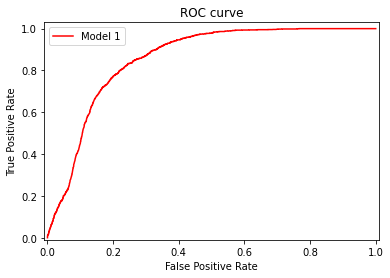

In [295]:
from matplotlib import pyplot as plt
_fpr, _tpr, _ = metrics.roc_curve(df['target'], df['p_churn'])

# plot the roc curve for the model
plt.plot(_fpr, _tpr, linestyle='-', color='red', label='Model 1')

# axis labels
plt.title('ROC curve')
plt.xlim(-0.01,1.01)
plt.ylim(-0.01,1.03)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

In [296]:
#metrics.roc_curve?

### Lift curve

In [297]:
[metrics.liftN(df['target'], df['p_churn'], x/10) for x in range (1,11)]

[2.306531204644412,
 2.564655037052907,
 2.418539014941893,
 2.1267203306629034,
 1.8638627559490868,
 1.6290557813709337,
 1.4191355404598403,
 1.2480818075848659,
 1.111484123653658,
 1]

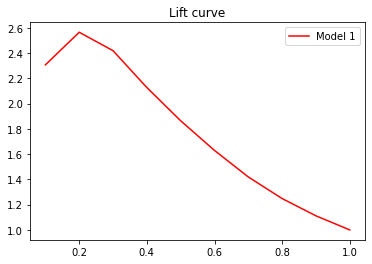

In [298]:
from matplotlib import pyplot as plt
x= [(x/10) for x in range (1,11)]
lift_curve = [metrics.liftN(df['target'], df['p_churn'], x/10) for x in range (1,11)]
plt.plot(x, lift_curve, linestyle='-', color='red', label='Model 1')
# axis labels
plt.title('Lift curve')
#plt.xlim(-0.01,1.01)
#plt.ylim(-0.01,1.03)
#plt.xlabel('False Positive Rate')
#plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

### Precision-Recall curve

In [299]:
metrics.precision_recall_curve(df['target'], df['p_churn'])

(array([0.27778632, 0.27767528, 0.27771798, ..., 1.        , 1.        ,
        1.        ]),
 array([1.00000000e+00, 9.99446597e-01, 9.99446597e-01, ...,
        1.10680686e-03, 5.53403431e-04, 0.00000000e+00]),
 array([0.00209515, 0.00209674, 0.00209705, ..., 1.        , 1.        ,
        1.        ]))

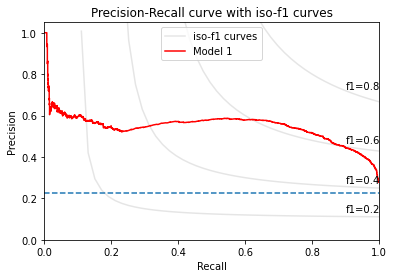

In [300]:
from matplotlib import pyplot as plt


f_scores = np.linspace(0.2, 0.8, num=4)
lines = []
labels = []
for f_score in f_scores:
    x = np.linspace(0.01, 1)
    y = f_score * x / (2 * x - f_score)
    l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
    plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))
lines.append(l)
labels.append('iso-f1 curves')

lr_precision, lr_recall, _ = metrics.precision_recall_curve(df['target'], df['p_churn'])
# plot the precision-recall curves
no_skill = len(df['target'][df['target']==1]) / len(df['target'])
plt.plot([0, 1], [no_skill, no_skill], linestyle='--')
l,=plt.plot(lr_recall, lr_precision,linestyle='-', color='red', label='Model 1')
lines.append(l)
labels.append('Model 1')
# axis labels
plt.title('Precision-Recall curve with iso-f1 curves')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
# show the legend
plt.legend(lines,labels)
# show the plot
plt.show()


# Basic Evaluators

## Lift Curve Evaluator

In [301]:
from mofr.basic_evaluators.LiftCurve import LiftCurveEvaluator

lce=LiftCurveEvaluator()

In [302]:
lce.d(df).t([('target','target_obs')]).s(['p_churn', 'semi_random_score','random_score'])

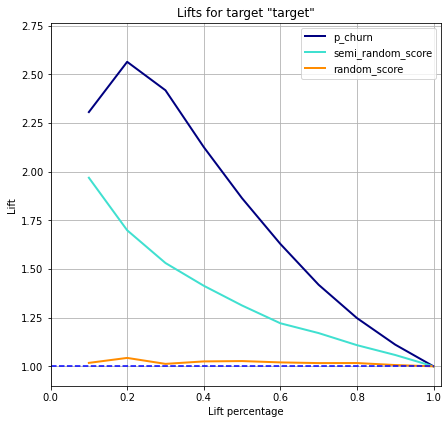

In [303]:
lce.get_graph()

## ROC Curve Evaluator

In [304]:
from mofr.basic_evaluators.ROCCurve import ROCCurveEvaluator

rce=ROCCurveEvaluator()

In [305]:
rce.d(df).t([('target','target_obs')]).s(['p_churn', 'semi_random_score','random_score'])

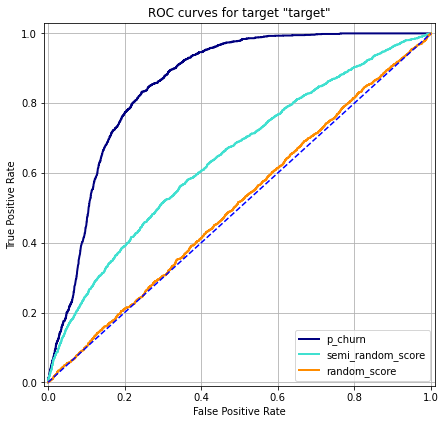

In [306]:
rce.get_graph()

## PR Curve Evaluator

In [307]:
from mofr.basic_evaluators.PRCurve import PRCurveEvaluator

prce=PRCurveEvaluator()

In [308]:
prce.d(df).t([('target','target_obs')]).s(['p_churn', 'semi_random_score','random_score'])

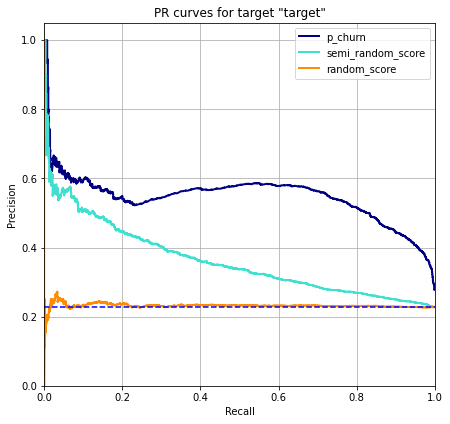

In [309]:
prce.get_graph()

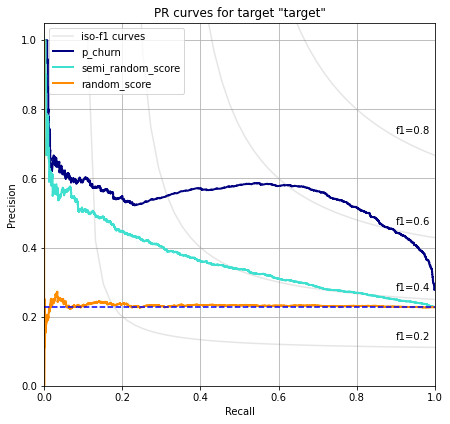

In [310]:
prce.get_graph(isocurves='on')

## Gini in Time Evaluator

In [311]:
from mofr.basic_evaluators.GiniInTime import GiniInTimeEvaluator

gite=GiniInTimeEvaluator()

In [312]:
gite.d(df).t([('target','target_obs')]).s(['p_churn', 'semi_random_score','random_score']).tc('month')

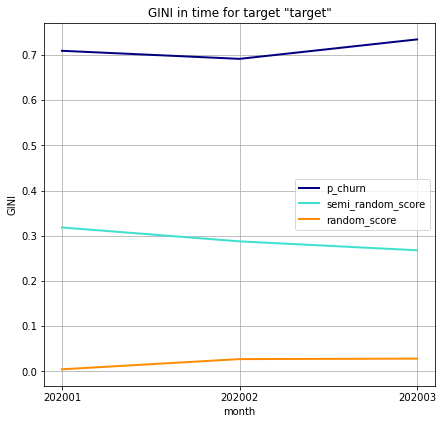

In [313]:
gite.get_graph()

In [314]:
gite.get_table()
gite.table

,p_churn,semi_random_score,random_score
month,,,
202001,0.709340,0.318462,0.004644
202002,0.691503,0.287731,0.027207
202003,0.734519,0.268019,0.028276
All,0.712179,0.291026,0.020002


## Lift in Time Evaluator

In [315]:
from mofr.basic_evaluators.LiftInTime import LiftInTimeEvaluator

lite=LiftInTimeEvaluator()

In [316]:
lite.d(df).t([('target','target_obs')]).s(['p_churn', 'semi_random_score','random_score']).tc('month')

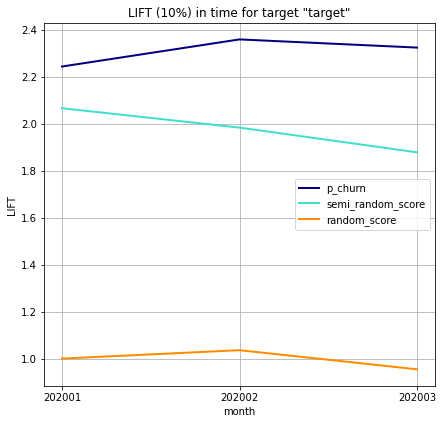

In [317]:
lite.get_graph()

In [318]:
lite.get_table()
lite.table

,p_churn,semi_random_score,random_score
month,,,
202001,2.242769,2.065284,1.000372
202002,2.358053,1.982908,1.036114
202003,2.323316,1.877749,0.954787
All,2.306531,1.969125,1.017750


## KS in Time Evaluator

In [319]:
from mofr.basic_evaluators.KSInTime import KSInTimeEvaluator

kite=KSInTimeEvaluator()

In [320]:
kite.d(df).t([('target','target_obs')]).s(['p_churn', 'semi_random_score','random_score']).tc('month')

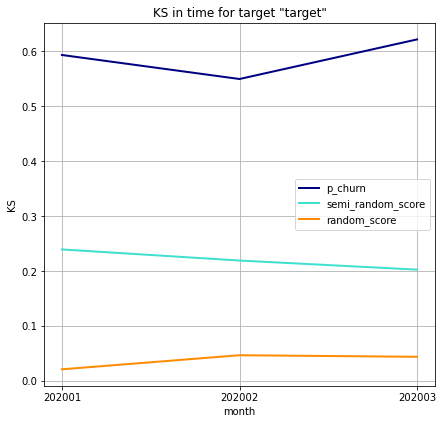

In [321]:
kite.get_graph()

In [322]:
kite.get_table()
kite.table

,p_churn,semi_random_score,random_score
month,,,
202001,0.593582,0.239686,0.021523
202002,0.549870,0.219489,0.047142
202003,0.621927,0.202916,0.044293
All,0.588207,0.216893,0.022298


## StabilityInTimeCategorical Evaluator

In [323]:
df['categorical_predictor']=df['target_obs'].apply(lambda x: random.choice(['A','B','C', 'D', 'F', 'G', 'H']))

In [324]:
from mofr.basic_evaluators.StabilityInTimeCategorical import StabilityInTimeCategoricalEvaluator

sitcae=StabilityInTimeCategoricalEvaluator()

In [325]:
sitcae.d(df).pc('categorical_predictor').tc('month')

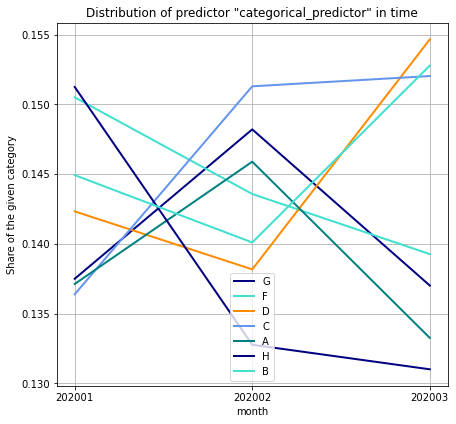

In [326]:
sitcae.get_graph()

In [327]:
sitcae.get_table()
sitcae.table

categorical_predictor,A,B,C,D,F,G,H
month,,,,,,,
202001,0.137124,0.144928,0.136381,0.142326,0.150502,0.137495,0.151245
202002,0.145890,0.140100,0.151293,0.138171,0.143574,0.148205,0.132767
202003,0.133258,0.152778,0.152027,0.154655,0.139264,0.137012,0.131006


## StabilityInTimeContinuous Evaluator

In [328]:
from mofr.basic_evaluators.StabilityInTimeContinuous import StabilityInTimeContinuousEvaluator

sitcoe=StabilityInTimeContinuousEvaluator()

In [329]:
sitcoe.d(df).pc('p_churn').tc('month')

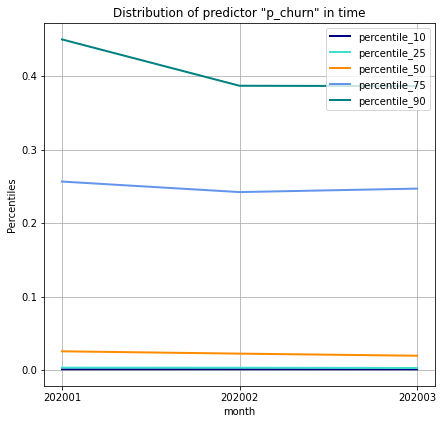

In [330]:
sitcoe.get_graph()

In [331]:
sitcoe.get_table()
sitcoe.table

,percentile_10,percentile_25,percentile_50,percentile_75,percentile_90
month,,,,,
202001,0.001139,0.003349,0.025581,0.256419,0.449709
202002,0.001173,0.003286,0.022429,0.242105,0.386693
202003,0.001111,0.002938,0.019563,0.246829,0.386225


## HistogramCategorical Evaluator

In [351]:
df['categorical_predictor']=df['target_obs'].apply(lambda x: random.choice(['A','B','C', 'D', 'F', 'G', 'H']))

In [352]:
from mofr.basic_evaluators.HistogramCategorical import HistogramCategoricalEvaluator

hcae=HistogramCategoricalEvaluator()

In [353]:
hcae.d(df).pc('categorical_predictor')

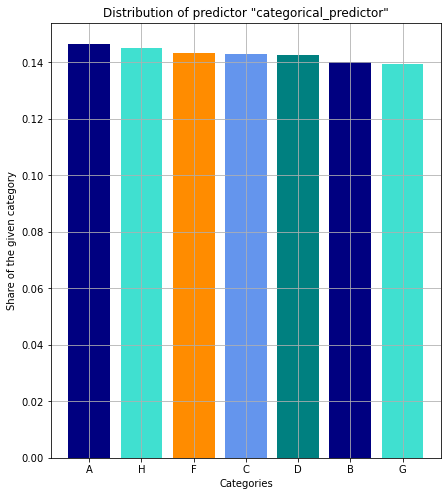

In [354]:
hcae.get_graph()

In [355]:
hcae.get_table()
pd.DataFrame(hcae.table)

,categorical_predictor %,categorical_predictor
A,0.146615,1165
H,0.145104,1153
F,0.143217,1138
C,0.142965,1136
D,0.142713,1134
B,0.140070,1113
G,0.139315,1107


## HistogramContinuous Evaluator

In [384]:
from mofr.basic_evaluators.HistogramContinuous import HistogramContinuousEvaluator

hcoe=HistogramContinuousEvaluator()

In [385]:
hcoe.d(df).pc('p_churn')

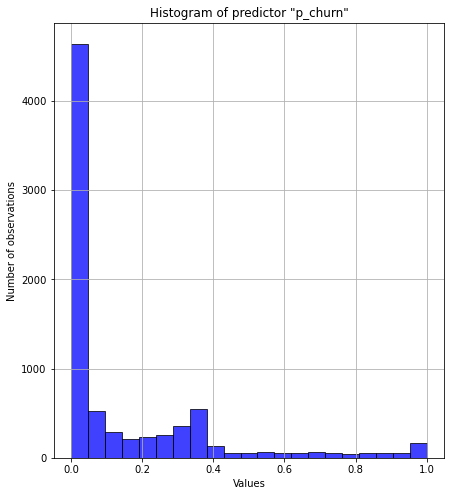

In [386]:
hcoe.get_graph()

In [387]:
hcoe.get_table()
hcoe.table

one,Percentiles
percentile_10,0.001139
percentile_25,0.003166
percentile_50,0.021627
percentile_75,0.247600
percentile_90,0.401849


# Misc

In [196]:
df['categorical_predictor']=df['target_obs'].apply(lambda x: random.choice(['A','B','C', 'D', 'F', 'G', 'H']))

In [ ]:
df['categorical_predictor'].value_counts(dropna=False, normalize=True).plot.bar(color=['navy', 'turquoise', 'darkorange', 'cornflowerblue', 'teal'])

In [210]:
a=df['categorical_predictor'].value_counts(dropna=False, normalize=True)
a

C    0.147118
G    0.146866
A    0.144979
B    0.143343
F    0.140951
D    0.140574
H    0.136169
Name: categorical_predictor, dtype: float64

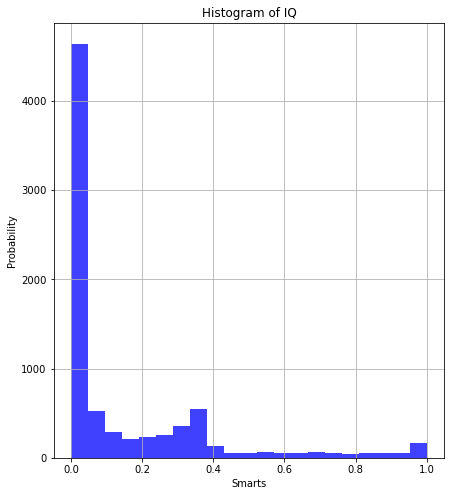

In [361]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 8))

# the histogram of the data
n, bins, patches = plt.hist(df['p_churn'], bins='doane', density=False, facecolor='b', alpha=0.75)


plt.xlabel('Smarts')
plt.ylabel('Probability')
plt.title('Histogram of IQ')
#plt.xlim(40, 160)
#plt.ylim(0, 0.03)
plt.grid(True)
plt.show()

In [212]:
a.values

array([0.14711805, 0.14686635, 0.14497861, 0.14334256, 0.14095142,
       0.14057387, 0.13616914])

In [83]:
list(df[self.predictor_column].unique())

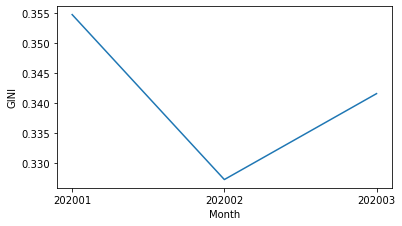

In [97]:
l, = plt.plot(a['A'])


#set plotting parameters
fig = plt.gcf()
fig.subplots_adjust(bottom=0.25)
plt.ticklabel_format(useOffset=False)
plt.xticks(range(min(a.index), max(a.index)+1))
#plt.xlim(min(_x)-0.1,max(_x)+0.1)
#plt.ylim(-0.01,1.03)
plt.xlabel('Month')
plt.ylabel('GINI')


plt.show()    

In [93]:
a['A']

month
202001    0.354704
202002    0.327259
202003    0.341555
Name: A, dtype: float64